<a href="https://colab.research.google.com/github/cdsouza2701/cdsouza2701/blob/main/Predictive__Analytics_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics


## Importing the data

####Importing Drive

In [ ]:
from google.colab import drive
drive.mount('/drive')

ModuleNotFoundError: No module named 'google'

####Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
np.random.seed(100)

####Importing data and checking the first 5 rows

In [ ]:
df = pd.read_excel('/drive/MyDrive/Colab Notebooks/lecture_samples_missings_incl.xlsx')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,timestamp,id,var1,var2,var3,var4,var5,var6,var7,var8,...,var54,var55,var56,var57,var58,var59,gender,marital status,target,zufall
0,202003,1,0.0,1,1,0,0,1,5,4,...,0,1,1,J,2,2,0,2.0,0,0.712323
1,202003,2,1.0,0,6,1,0,1,0,4,...,0,67,1,NaN,2,2,W,4.0,0,0.899256
2,202003,3,1.0,1,4,1,0,1,5,4,...,0,88,1,J,2,2,W,4.0,0,0.694794
3,202003,4,0.0,1,3,0,1,1,0,4,...,0,50,1,J,0,0,W,0.0,0,0.211222
4,202003,5,1.0,0,4,1,0,1,0,4,...,0,52,1,J,1,2,NaN,2.0,0,0.557721


## Exploring the Data


#### Checking the info

**Reason**:
Looking for data types and number of null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       100000 non-null  int64  
 1   id              100000 non-null  int64  
 2   var1            94976 non-null   float64
 3   var2            100000 non-null  int64  
 4   var3            100000 non-null  int64  
 5   var4            100000 non-null  int64  
 6   var5            100000 non-null  int64  
 7   var6            100000 non-null  int64  
 8   var7            100000 non-null  int64  
 9   var8            100000 non-null  int64  
 10  var9            99807 non-null   object 
 11  var10           86876 non-null   float64
 12  var11           97072 non-null   object 
 13  var12           100000 non-null  object 
 14  var13           100000 non-null  object 
 15  var14           99904 non-null   object 
 16  var15           100000 non-null  float64
 17  var16      



---



####Looking through the data

**Reason**
To explore the different values and their count in each variable

In [ ]:
for col in df.columns:
    display(df.groupby(col).size())
    print()

timestamp
202003    50000
202006    50000
dtype: int64

id
1         1
2         1
3         1
4         1
5         1
         ..
99996     1
99997     1
99998     1
99999     1
100000    1
Length: 100000, dtype: int64

var1
0.0    68558
1.0    26418
dtype: int64

var2
0    45977
1    54023
dtype: int64

var3
0        12
1     12999
2     30748
3     23825
4     16721
5      9609
6      4264
7      1408
8       302
9        99
10        8
11        5
dtype: int64

var4
0    38944
1    61056
dtype: int64

var5
0    95703
1     4297
dtype: int64

var6
0    37157
1    62843
dtype: int64

var7
0     60284
2      4073
5     23625
6      1931
10     9509
11       57
12      131
13      187
19      203
dtype: int64

var8
0       51
3     3872
4    96077
dtype: int64

var9
J    30697
N    69110
dtype: int64

var10
-1000.0      158
 0.0        8146
 1.0       72071
 2.0        1151
 3.0         826
 4.0          50
 5.0        1470
 6.0        1081
 7.0        1792
 8.0         131
dtype: int64

var11
0      7325
1      2979
10     2524
11     1923
12       14
13     2208
14     2004
15     1980
16       19
17     1661
18     1765
19     4045
2      3926
20     2063
21     2084
22     4333
23     1950
24     2573
25     1787
28     1173
3       320
32       68
33     2209
35       13
36     3377
4      1768
5        27
6       633
7      1394
9      1483
RE    37444
dtype: int64

var12
0     7423
1    11398
2    11820
3    10508
4    10446
5    10132
6    10081
7     9967
8     9527
9     8487
G      211
dtype: int64

var13
0      100
1      167
2      144
3      148
4      124
5      149
6      131
7      179
8      183
9      371
0     7580
1     9217
2     8760
3     8132
4     7868
5     8104
6     8687
7     9691
8    11494
9    18563
G      208
dtype: int64

var14
0         4270
1S 00        7
1SS00    56357
2S 01        4
2SS00    37925
2SS01        1
3SU00      362
3SU10        2
4SH00      773
4SM00       26
4SN00      177
dtype: int64

var15
-1000.000000      32070
 0.000000          6603
 1.000000          5993
 26.747403            1
 26.835566            1
                  ...  
 357290.957300        1
 369023.682100        1
 375231.972700        1
 381293.527300        1
 381938.434300        1
Length: 55337, dtype: int64

var16
-1000.000000      32096
 0.000000          6925
 1.000000          4391
 16.659981            1
 17.393084            1
                  ...  
 314847.051000        1
 317315.782400        1
 317399.601800        1
 324645.904600        1
 324761.996000        1
Length: 56591, dtype: int64

var17
-1000.000000     32261
 0.000000         2984
 0.555838            1
 0.558378            1
 0.560359            1
                 ...  
 40777.926080        1
 51784.260280        1
 53400.120790        1
 69465.068230        1
 71416.484880        1
Length: 24427, dtype: int64

var18
-1000     32150
 0         4799
 1        21846
 500         19
 501         29
          ...  
 49990        1
 49991        1
 49992        1
 49995        1
 49999        1
Length: 9633, dtype: int64

var19
-1000    45549
 1       47767
 2        5812
 3         708
 4         113
 5          31
 6          16
 7           1
 8           2
 11          1
dtype: int64

var20
-1.000000e+03    46460
 0.000000e+00     5645
 1.000000e+00       14
 1.080898e+02        1
 1.112723e+02        1
                 ...  
 4.108599e+06        1
 4.110312e+06        1
 4.122021e+06        1
 4.137550e+06        1
 4.145056e+06        1
Length: 47869, dtype: int64

var21
-1000.000000      95198
 0.000000           389
 1.000000          1152
 50.000000           10
 50.000465           10
                  ...  
 493435.300400        1
 524114.195800        1
 535228.971500        1
 553159.332000        1
 588487.509700        1
Length: 3215, dtype: int64

var22
0    46462
1      996
2    18307
3    16691
4    11779
5     5765
dtype: int64

var23
-     1008
0    45478
A     6746
B     7268
C     9844
D     8789
S    18189
V        6
X     2672
dtype: int64

var24
-1.000000e+03    46459
 0.000000e+00     5704
 1.000000e+00       10
 1.133072e+02        1
 1.231893e+02        1
                 ...  
 4.109911e+06        1
 4.111280e+06        1
 4.121582e+06        1
 4.136744e+06        1
 4.144621e+06        1
Length: 47816, dtype: int64

var25
-1.000000e+03    45588
 0.000000e+00     3462
 1.000000e+00    24927
 1.024000e+03        1
 4.039635e+03        1
                 ...  
 2.032183e+06        1
 2.034501e+06        1
 2.035051e+06        1
 2.035566e+06        1
 2.036340e+06        1
Length: 26020, dtype: int64

var26
-1.000000e+03    45550
 0.000000e+00     3334
 1.000000e+00    22494
 5.647476e+02        1
 6.000191e+02        1
                 ...  
 1.609668e+06        1
 1.618424e+06        1
 1.624615e+06        1
 1.624691e+06        1
 1.641664e+06        1
Length: 28611, dtype: int64

var27
-1000    46504
 0       53496
dtype: int64

var28
-1000    45548
 3       47059
 4        5874
 5        1519
dtype: int64

var29
-1000    68295
 1       21047
 2        6862
 3        2408
 4         820
 5         327
 6         141
 7          50
 8          33
 9          10
 10          1
 11          1
 12          1
 13          4
dtype: int64

var30
-1000.000000      91183
 0.000000           654
 1.000000          2203
 344.001672           1
 352.517837           1
                  ...  
 455411.077100        1
 455436.196900        1
 455436.576000        1
 455458.298000        1
 455461.689900        1
Length: 5943, dtype: int64

var31
-1000.000000      68399
-0.097145             1
 0.000000          3235
 0.023760             1
 0.042368             1
                  ...  
 395610.060000        1
 396291.773800        1
 396937.072400        1
 398914.074400        1
 403898.503700        1
Length: 26948, dtype: int64

var32
0    86985
J     1373
N    11642
dtype: int64

var33
0    85303
J     5349
N     9348
dtype: int64

var34
0     42905
1       271
2        11
4        14
12     7647
0     41584
1       259
12     7261
2        12
4        30
E         6
dtype: int64

var35
-1000      68578
 0          3342
 5448          1
 5477          1
 5478          1
           ...  
 578581        1
 592025        1
 622070        1
 631802        1
 635760        1
Length: 22524, dtype: int64

var36
0    68401
1     1140
2     8360
3        3
4        6
6        7
7     6008
B       89
F        1
K        1
L    13312
S     2672
dtype: int64

var37
-1000     68511
 0         3336
 17371        1
 17372        1
 17388        1
          ...  
 42516        1
 42517        1
 42518        1
 42519        1
 42520        9
Length: 10720, dtype: int64

var38
-1000     68323
 0         3213
 13635        1
 13646        1
 13657        1
          ...  
 19431      102
 19432      124
 19433       74
 19448       14
 19449       20
Length: 4780, dtype: int64

var39
-35000.000000    73486
-34008.000000        1
-27423.025070        1
-27302.327580        1
-27076.868240        1
                 ...  
-0.001336            1
-0.000455            1
 0.000000         2681
 0.009492            1
 1.000000          550
Length: 21560, dtype: int64

var40
-1000.000000     73485
 0.000000         2863
 509.000000          2
 923.900970          1
 941.111357          1
                 ...  
 72710.168300        1
 72915.733730        1
 72925.760830        1
 72973.551310        1
 73044.580860        1
Length: 23593, dtype: int64

var41
-1000    73399
 0        2653
 3           2
 4           1
 6           7
         ...  
 141        65
 142       265
 143         1
 144         1
 216         5
Length: 139, dtype: int64

var42
0    96436
1     3564
dtype: int64

var43
0     60320
2      4057
5     23585
6      1929
10     9511
11       47
12      132
13      206
19      213
dtype: int64

var44
M    45702
U    11051
W    43247
dtype: int64

var45
0     73176
1       946
12       39
13        6
14       31
15       58
16        5
18       10
19        4
2       424
20        2
21      200
27        2
3      3455
4       178
41       17
42       53
5        74
6       151
69        1
7         5
71     6292
8        62
81     6796
98       26
99     7594
RE      393
dtype: int64

var46
13       60
15       29
22       24
26        3
28       10
29       21
30        1
36       12
45      142
50       38
51      174
52      234
55       63
67        8
70       98
72       15
74      889
80        6
85      516
91       28
92       94
93      428
RE      312
U     96795
dtype: int64

var47
0      14115
11      1727
12      4423
13     29614
15       616
16       447
17       701
18        43
19      1706
20      7663
22      6177
23     20350
24      3445
25       642
26        74
27         9
28      5110
29       752
30       499
31       990
RES      897
dtype: int64

var48
0    42962
1     1301
2    19234
3    18050
4    12412
5     6041
dtype: int64

var49
0.000000          6950
1.000000         35319
523.004184           1
525.750244           1
526.446755           1
                 ...  
292987.557000        1
295022.742300        1
305754.413900        1
306099.163800        1
307751.308900        1
Length: 57732, dtype: int64

var50
0     9526
1      154
28      17
29     375
30     818
      ... 
89     136
90      63
91     214
92    1772
93     329
Length: 68, dtype: int64

var51
1: <= 26         3018
2: 27 - 33       8599
3: 34 - 37       6118
4: 38 - 47      15806
5: 48 - 54      12310
6: 56 - 65      18570
7: > 65         35426
8: unbekannt      153
dtype: int64

var52
1       157
2      6339
3        76
4      7190
5       306
6     73049
7      7592
8       673
9      3438
10     1180
dtype: int64

var53
0    65496
1    34504
dtype: int64

var54
0    90304
1     9696
dtype: int64

var55
0      8996
1     10935
28       16
29      366
30      835
      ...  
90       32
91       96
92      702
93      831
94       99
Length: 69, dtype: int64

var56
1    89114
2    10747
3      139
dtype: int64

var57
J    71216
N       12
dtype: int64

var58
0    29042
1    40506
2    26575
3     3877
dtype: int64

var59
0    28076
1     3095
2    68829
dtype: int64

gender
0     9281
M    39098
W    36707
dtype: int64

marital status
0.0    12114
1.0    25447
2.0    41251
3.0     7493
4.0    10781
5.0      718
6.0     1280
7.0      797
8.0       82
dtype: int64

target
0    93500
1     6500
dtype: int64

zufall
0.000003    1
0.000021    1
0.000030    1
0.000050    1
0.000059    1
           ..
0.999921    1
0.999923    1
0.999934    1
0.999935    1
0.999974    1
Length: 99997, dtype: int64

##Cleaning the data


####Replacing the current index
<!-- **Reason**:
? -->

In [ ]:
df.set_index('id',drop=True, inplace=True)

In [ ]:
df.head()

,timestamp,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var54,var55,var56,var57,var58,var59,gender,marital status,target,zufall
id,,,,,,,,,,,,,,,,,,,,,
1,202003,0.0,1,1,0,0,1,5,4,N,...,0,1,1,J,2,2,0,2.0,0,0.712323
2,202003,1.0,0,6,1,0,1,0,4,N,...,0,67,1,NaN,2,2,W,4.0,0,0.899256
3,202003,1.0,1,4,1,0,1,5,4,N,...,0,88,1,J,2,2,W,4.0,0,0.694794
4,202003,0.0,1,3,0,1,1,0,4,N,...,0,50,1,J,0,0,W,0.0,0,0.211222
5,202003,1.0,0,4,1,0,1,0,4,N,...,0,52,1,J,1,2,NaN,2.0,0,0.557721




---

####Filling all the NA Values

**Reason**: Filling all the NA Values with either the mode or the median to use all rows and not delete them

In [ ]:
for col in ['var1','var9','var10','var11','var14','var57','gender','marital status']:
    if df[col].dtypes == 'object':
        df[col].fillna(df[col].mode().values[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)



---


####Checking to see if all rows are filled

**Reason**: Verification


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 64 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       100000 non-null  int64  
 1   var1            100000 non-null  float64
 2   var2            100000 non-null  int64  
 3   var3            100000 non-null  int64  
 4   var4            100000 non-null  int64  
 5   var5            100000 non-null  int64  
 6   var6            100000 non-null  int64  
 7   var7            100000 non-null  int64  
 8   var8            100000 non-null  int64  
 9   var9            100000 non-null  object 
 10  var10           100000 non-null  float64
 11  var11           100000 non-null  object 
 12  var12           100000 non-null  object 
 13  var13           100000 non-null  object 
 14  var14           100000 non-null  object 
 15  var15           100000 non-null  float64
 16  var16           100000 non-null  float64
 17  var17     



---


#### Converting "object" data types & Dropping Zufall
**Reason:**

1.   Converting "object" data types: categorical data into dummy or indicator variables ...
2.   Droping Zufall: Unnecessary data


In [ ]:
col = df.select_dtypes(include='object').columns

for i in col:
    df = pd.merge(left=pd.get_dummies(df[i], prefix=i, prefix_sep='_'),
                    right=df,
                    left_index=True,
                    right_index=True)

    df = df.drop(columns = [i])

df = df.drop(columns=['zufall'])

In [ ]:
# col = ['var3','var7','var8','var9','var10','var11','var12','var13','var14','var19','var22','var23','var27',
#        'var28','var29','var32','var33','var34','var36','var43','var44','var45','var46','var47','var48',
#        'var50','var51','var52','var55','var56','var57','var58','var59','gender','marital status']





---


#### Checking the data shape & info
**Reason**: For verification purposes

In [ ]:
df.shape

(100000, 248)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Columns: 248 entries, gender_0 to target
dtypes: float64(16), int64(30), uint8(202)
memory usage: 57.1 MB


## Modelling

#### Splitting the data & Dropping timestamp

**Reason**:

1.   Splitting the data: To use for training and testing
2.   Dropping timestamp: Unnecessary for prediction



In [ ]:
df_202003 = df[df['timestamp'] == 202003].drop(columns=['timestamp'])
df_202006 = df[df['timestamp'] == 202006].drop(columns=['timestamp'])

print(df_202003.shape,df_202006.shape)

(50000, 247) (50000, 247)




---


#### Checking target values

**Reason**: To see target values in both March and June Datasets

In [ ]:
display(df_202003.groupby('target').size()) # March dataset
display(df_202006.groupby('target').size()) # June dataset

target
0    47000
1     3000
dtype: int64

target
0    46500
1     3500
dtype: int64




---


#### Scaling Both DataFrames

**Reason**: Recommended pre-processing step when working with deep learning neural networks. Improves Neural Network's performance.

In [ ]:
X_train = df_202003.drop(columns=['target']).values            # Feature vector
y_train = df_202003['target'].values                           # Label vector

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(df_202006.drop(columns = ['target']).values)
y_test = df_202006['target'].values



---


#### Plotting Explained Variance of Principal Component Analysis

**Reason**:
1. Simplifies the complexity in high-dimensional data while retaining trends and patterns, makes it easier to interpret the data.
2. Checking if our data is useful.
3. Once you perform the PCA operation, you have identified the major components of variation, the eigenvectors

It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.

**Lookouts**: How much variance is acceptable in PCA?
It should not be less than 60%. If the variance explained is 35%, it shows the data is not useful.

In [ ]:
pca = PCA().fit(X_train)
explained_var = np.cumsum(pca.explained_variance_ratio_)        # Getting explained variance
index_95 = np.where(np.array(explained_var) >= 0.95)[0][0]+1    # Getting the number of features which can explain 95% varaiance

Text(0.5, 1.0, 'Explained Variance of PCA')

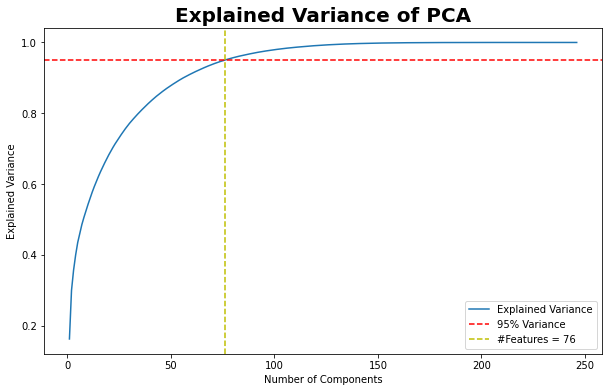

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,len(X_train.T)+1),explained_var, label = 'Explained Variance')
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label = '95% Variance')
plt.axvline(x = index_95, color = 'y', linestyle = '--', label = f'#Features = {index_95}')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCA', fontsize=20, fontweight='bold')

In [ ]:
pca = PCA(n_components=index_95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train
)

# here you skip the anomaly datas (autoencoder)



---

#### Using an auto encoder to detect anomilies

**Reason**: Autoencoder is used to compress the data and regenerate it.

Claim: If we fit the autoencoder on normal data, it will give less error for normal data and more error for anomaly data when we regerate them.

Structure:
Three components
1.   Encoder - Compresses the data

2.   Bridge - Connects encoder with decoder

3. Decoder - Regenerates the data


In [ ]:
# use case is novelty detection so use only the normal data
# for training
train_index = np.where(y_train == 1)
train_data = x_train[train_index]



---

#### Creating Neural Network using tensorflow

In [ ]:
# creating a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
    """
    Parameters
    ----------
    output_units: int
        Number of output units

    code_size: int
        Number of units in bottle neck
    """

    def __init__(self, output_units, code_size=8):
        super().__init__()
        self.encoder = Sequential([
        Dense(132, activation='relu'), # ReLU (Rectified linear Unit) = activation function for Neural Networks
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(code_size, activation='relu')
        ])
        self.decoder = Sequential([
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(132, activation='relu'),
        Dropout(0.1),
        Dense(output_units, activation='sigmoid') # Sigmoid = activation function for Neural Networks
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

model = AutoEncoder(output_units=x_train.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer=Adam(0.001))

history = model.fit(
    x_train,
    x_train,
    epochs=50,  # The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
    batch_size=64, # The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
    validation_data=(x_val, x_val)
)



Epoch 1/50
625/625 [==============================] - 4s 5ms/step - loss: 0.0295 - mse: 0.1674 - val_loss: 0.0217 - val_mse: 0.1443
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0215 - mse: 0.1404 - val_loss: 0.0193 - val_mse: 0.1335
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0201 - mse: 0.1344 - val_loss: 0.0183 - val_mse: 0.1307
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0192 - mse: 0.1315 - val_loss: 0.0175 - val_mse: 0.1268
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0186 - mse: 0.1293 - val_loss: 0.0169 - val_mse: 0.1252
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.0181 - mse: 0.1278 - val_loss: 0.0165 - val_mse: 0.1236
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.0177 - mse: 0.1266 - val_loss: 0.0162 - val_mse: 0.1232
Epoch 8/50
625/625 [==============================] - 3s 5ms/step - loss: 0.



---


#### Plotting MSLE against Epochs

**Reason**: We want to see our loss decrease.

The loss function is what SGD is attempting to minimize by iteratively updating the weights in the network.

Loss values are the values indicating the difference from the desired target state(s)

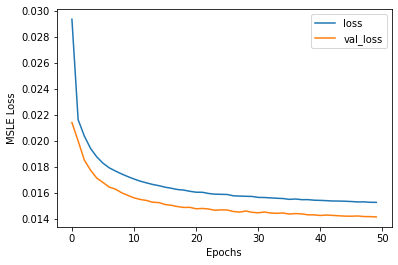

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()



---


#### Checking the accuracy of the model by comparing to the test data

In [ ]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
        + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    # 1 = anomaly, 0 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
    return preds

threshold = find_threshold(model, x_train)
print(f"Threshold: {threshold}")

predictions = get_predictions(model, X_test, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.023800328303848588


0.6223



---

#### Plotting confusion matrix

In [ ]:
def plot_confusion_matrix(conf_mat):
    '''
    Function for Plotting the confusion matrix
    Takes raw confusion matrix as input
    '''
    classes = [0,1]                                 # Our Two classes
    df_cm = pd.DataFrame(conf_mat,classes,classes)  # Make dataframe of the confusion matrix
    data = df_cm.values.astype(str)                 # Converting values to string
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1.4)                         # Setting fontsize
    sns.heatmap(df_cm, annot=data, fmt = '', annot_kws={"size": 16})    # Generating heatmap
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def report(y_test,pred_test):
    '''
    Function for printing the classification report
    Takes actual: x and predicted label: y as input
    computes accuracy, classification report, confusion matrix
    '''
    print('\nFor Testing Data')
    cr_test = classification_report(y_test,pred_test,zero_division=0)
    print("\nClassification Report:\n", cr_test)

    cm_test = confusion_matrix(y_test,pred_test,labels=[0, 1])
    plot_confusion_matrix(cm_test)


For Testing Data

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.63      0.76     46500
           1       0.10      0.53      0.16      3500

    accuracy                           0.62     50000
   macro avg       0.52      0.58      0.46     50000
weighted avg       0.89      0.62      0.71     50000



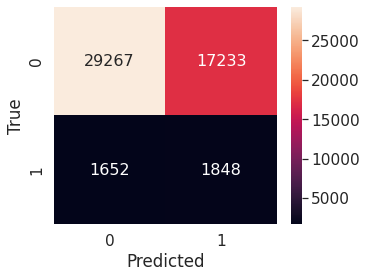

In [ ]:
report(y_test,predictions)